In [1]:
import networkx as nx
from statsmodels.distributions.empirical_distribution import ECDF
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sp

# Drawing networks

NetworkX provides basic functionality for visualizing graphs, but its main goal is to enable graph analysis rather than perform graph visualization.

__draw(G, pos=None, ax=None, hold=None, **kwds)__


Draw the graph as a __simple representation with no node labels or edge labels__ and using the full Matplotlib figure area and no axis labels by default. See draw_networkx() for more full-featured drawing that allows title, axis labels etc.

Parameters:	
- G__ (graph) – A networkx graph

- pos__ (dictionary, optional) – A dictionary with nodes as keys and positions as values. If not specified a spring layout positioning will be computed. See networkx.layout for functions that compute node positions:
circular_layout, fruchterman_reingold_layout, random_layout, shell_layout, spectral_layout

- ax (Matplotlib Axes object, optional) – Draw the graph in specified Matplotlib axes.

- hold (bool, optional) – Set the Matplotlib hold state. If True subsequent draw commands will be added to the current axes.

- kwds (optional keywords) – See networkx.draw_networkx() for a description of optional keywords.


A better visualization method is  **draw_networkx(G, pos=None, arrows=True, with_labels=True, **kwds)** (https://networkx.readthedocs.io/en/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html#networkx.drawing.nx_pylab.draw_networkx)


# Read graphs
Many formats. We will see adjacency list, edge list, reading file line by line.

## Adjacency list

Read and write NetworkX graphs as adjacency lists. 
It is useful for graphs without data associated with nodes or edges

Adjacency list format. 
The adjacency list format consists of lines with node labels. The first label in a line is the source node. Further labels in the line are considered target nodes and are added to the graph along with an edge between the source node and target node.

NetworkX method.
**read_adjlist(path, comments='#', delimiter=None, create_using=None, nodetype=None, encoding='utf-8')**

Parameters
- path (string or file) – Filename or file handle to read. Filenames ending in .gz or .bz2 will be uncompressed.

- create_using (NetworkX graph constructor, optional (default=nx.Graph)) – Graph type to create. If graph instance, then cleared before populated.

- nodetype (Python type, optional) – Convert nodes to this type (must be hashable.

- comments (string, optional) – Marker for comment lines

 -delimiter (string, optional) – Separator for node labels. The default is whitespace.

Returns
G – The graph corresponding to the lines in adjacency list format.

Return type
NetworkX graph


In [2]:
adj_graph = nx.Graph()

In [7]:
adj_graph = nx.read_adjlist('grafo_lista_adiacienza.txt',
                            delimiter=',',nodetype=int,
                            create_using=nx.Graph())

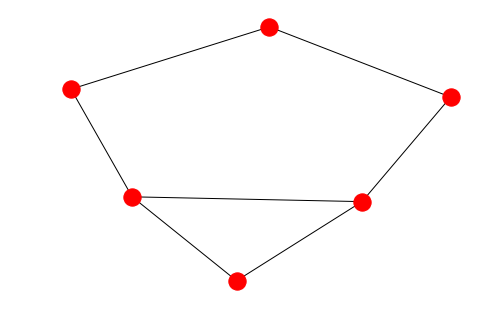

In [8]:
node_position = nx.spring_layout(adj_graph)
nx.draw(adj_graph,pos=node_position)

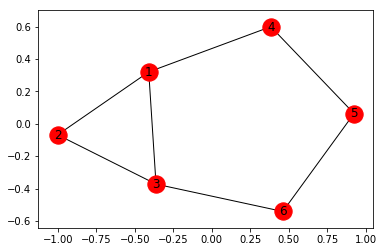

In [9]:
position_circular = nx.spring_layout(adj_graph)
nx.draw_networkx(adj_graph,pos=position_circular)

### Edge list

Read and write NetworkX graphs as edge lists.

The multi-line adjacency list format is useful for graphs with nodes that can be meaningfully represented as strings. With the edgelist format simple edge data can be stored but node or graph data is not. There is no way of representing isolated nodes unless the node has a self-loop edge.
Each line corresponds to an edge


**read_edgelist(path, comments='#', delimiter=None, create_using=None, nodetype=None, data=True, edgetype=None, encoding='utf-8')**

In [11]:
edgelist_graph = nx.read_edgelist('grafo_edge_list.txt',
                                  delimiter=' ', 
                                  create_using=nx.Graph(),
                                  nodetype=int)

### GEXF

**write_gexf(G, path, encoding='utf-8', prettyprint=True, version='1.1draft')**


In [13]:
nx.write_gexf(edgelist_graph,'edgeList4Gephi.gexf')

# Network Repository: Zachary's Karate Club


Open the file 'karate.mtx' with a text editor <br>

%%MatrixMarket matrix coordinate pattern symmetric<br>
34 34 78<br>
2 1<br>
3 1<br>
4 1<br>
5 1<br>
6 1<br>
7 1<br>
8 1<br>
9 1<br>
11 1

First two lines are metadata. We need to read the file line by line 

In [14]:
karate_graph = nx.Graph()
karate_graph_edge_list=nx.Graph()

In [17]:
# readlines() is used to read all the lines at a single go and then return them as each line a string element in a list. 
# This function can be used for small files, as it reads the whole file content to the memory, then split it into separate lines. 
# We can iterate over the list and strip the newline '\n' character using strip() function.

with open('karate.mtx') as f:
    f.readline()
    f.readline()
    for line in f:
        source, destination = line.strip().split(' ') #tuple
        karate_graph.add_edge(source,destination)

# or we could delete the first two lines with the meatdata
karate_graph_edge_list=nx.read_edgelist('karate_edge_list.txt')

In [21]:
print('Number of nodes: {} - Number of links:{}'.format(karate_graph.order(),karate_graph.size()))
print('Number of nodes: {} - Number of links:{}'.format(karate_graph_edge_list.order(),karate_graph_edge_list.size()))

Number of nodes: 34 - Number of links:78
Number of nodes: 34 - Number of links:78


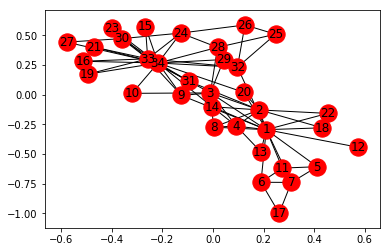

In [22]:
posizione = nx.spring_layout(karate_graph)
nx.draw_networkx(karate_graph,pos=posizione)

## Analysis of the degree


In [39]:
karate_degree_view=karate_graph.degree()
print(type(karate_degree_view))
print(karate_degree_view)

karate_degree=list(dict(karate_graph.degree()).values())
print('\n',type(karate_degree))
print(karate_degree)


<class 'networkx.classes.reportviews.DegreeView'>
[('2', 9), ('1', 16), ('3', 10), ('4', 6), ('5', 3), ('6', 4), ('7', 4), ('8', 4), ('9', 5), ('11', 3), ('12', 1), ('13', 2), ('14', 5), ('18', 2), ('20', 3), ('22', 2), ('32', 6), ('31', 4), ('10', 2), ('28', 4), ('29', 3), ('33', 12), ('17', 2), ('34', 17), ('15', 2), ('16', 2), ('19', 2), ('21', 2), ('23', 2), ('26', 3), ('24', 5), ('30', 4), ('25', 3), ('27', 2)]

 <class 'list'>
[9, 16, 10, 6, 3, 4, 4, 4, 5, 3, 1, 2, 5, 2, 3, 2, 6, 4, 2, 4, 3, 12, 2, 17, 2, 2, 2, 2, 2, 3, 5, 4, 3, 2]


In [25]:
karate_graph.degree('34')

17

#### Degree: mean, median, standard deviation, min and max

In [28]:
print(np.mean(karate_degree))
print(np.median(karate_degree)) 
print(np.std(karate_degree))
print(np.max(karate_degree))
print(np.min(karate_degree))

4.588235294117647
3.0
3.820360677912828
17
1


## ECDF and ECCDF
Use the ECDF object of the module statsmodel. It returns a CDF starting from the given sample

In [29]:
from statsmodels.distributions.empirical_distribution import ECDF

# matplotlib.org 
a comprehensive library for creating static, animated, and interactive visualizations in Python.

Text(0,0.5,'ECCDF')

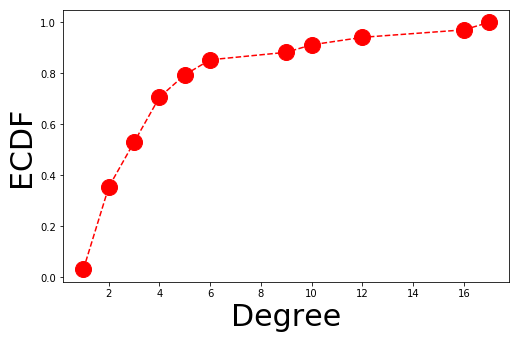

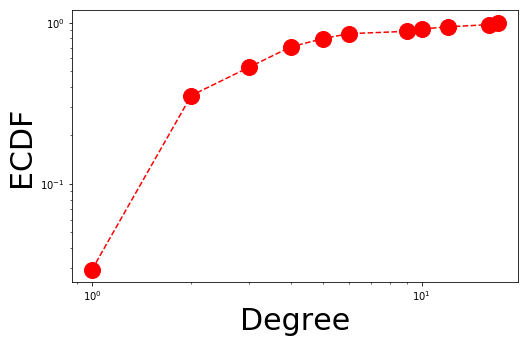

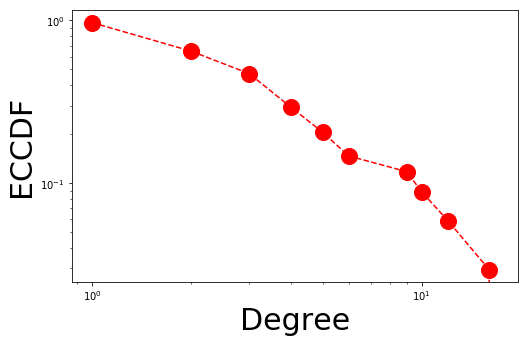

In [30]:
# ECDF in linear scale
cdf_function = ECDF(karate_degree)
x = np.unique(karate_degree)
y = cdf_function(x)
fig_cdf_function = plt.figure(figsize=(8,5)) 
axes = fig_cdf_function.gca()
axes.plot(x,y,color = 'red', linestyle = '--', marker= 'o',ms = 16)
axes.set_xlabel('Degree',size = 30)
axes.set_ylabel('ECDF',size = 30)

# ECDF in loglog scale
fig_cdf_function = plt.figure(figsize=(8,5))
axes = fig_cdf_function.gca()
axes.loglog(x,y,color = 'red', linestyle = '--', marker= 'o',ms = 16)
axes.set_xlabel('Degree',size = 30)
axes.set_ylabel('ECDF',size = 30)

# ECCDF in loglog scale
y = 1-cdf_function(x)
fig_ccdf_function = plt.figure(figsize=(8,5))
axes = fig_ccdf_function.gca()
axes.loglog(x,y,color = 'red', linestyle = '--', marker= 'o',ms = 16)
axes.set_xlabel('Degree',size = 30)
axes.set_ylabel('ECCDF',size = 30)


## Hubs
Nodes with high degree.
Fix the quantile in the CDF. given $q \in [0,1]$ find the degree $k$ such that $F_X(k)=q$. We use the Numpy function **percentile**. $q=0.95$

In [31]:
percentile_95 = np.percentile(karate_degree,95)
print(percentile_95)

13.399999999999991


Now we can identify the hubs by using the list comprehension

In [32]:
hub_nodi = [k for k,v in dict(karate_graph.degree()).items() if v>= percentile_95]
print(hub_nodi)

['1', '34']


# Random networks: the Erdos-Renyi model


#### erdos_renyi_graph(n, p, seed=None, directed=False)


Returns a G(n,p) random graph, also known as an Erdős-Rényi graph or a binomial graph.

The G(n,p) model chooses each of the possible edges with probability p.

The functions binomial_graph() and erdos_renyi_graph() are aliases of this function.

Parameters:
- n (int) – The number of nodes.

- p (float) – Probability for edge creation.

- seed (integer, random_state, or None (default)) – Indicator of random number generation state. See Randomness.

- directed (bool, optional (default=False)) – If True, this function returns a directed graph.

#### gnp_random_graph()

#### fast_gnp_random_graph()

it is a faster algortihm for sparse networks

In [33]:
mean_degree_karate = np.mean(karate_degree)

From
$$ <k> = p (N-1)$$
we obtain $p = \frac{<k>}{N-1}$

In [34]:
p = mean_degree_karate / (karate_graph.order()-1)

In [35]:
random_graph = nx.fast_gnp_random_graph(karate_graph.order(),p)

In [36]:
print('Number of nodes: {}'.format(random_graph.order()))
print('Number of links: {}'.format(random_graph.size()))

Number of nodes: 34
Number of links: 69


In [37]:
random_degree = list(dict(random_graph.degree()).values())

Text(0,0.5,'ECCDF')

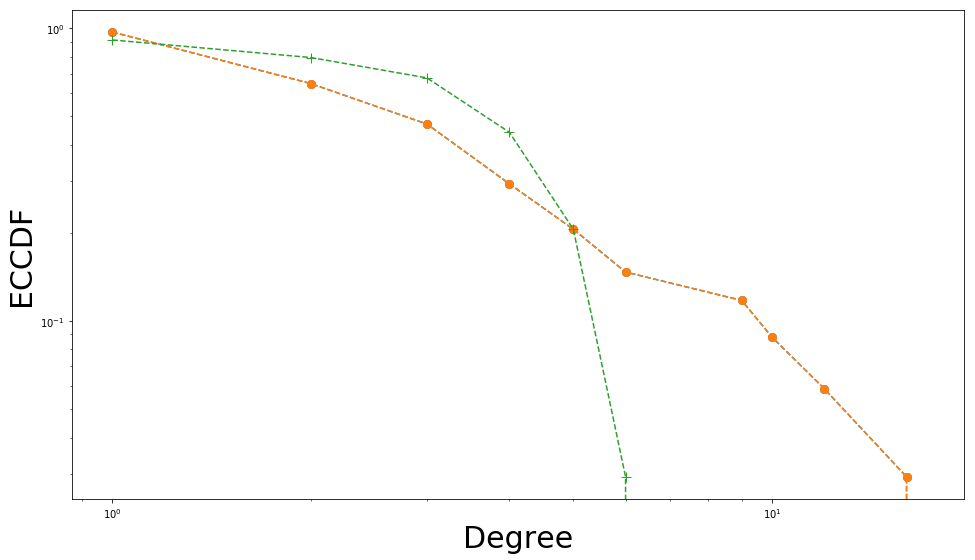

In [38]:
cdf_karate = ECDF(karate_degree)
x_karate = np.unique(karate_degree)
y_karate = cdf_karate(x_karate)
cdf_random = ECDF(random_degree)
x_random = np.unique(random_degree)
y_random = cdf_random(x_random)
fig_cdf_karate = plt.figure(figsize=(16,9))
assi = fig_cdf_karate.gca()
assi.set_xscale('log')
assi.set_yscale('log')
assi.loglog(x_karate,1-y_karate,marker='o',ms=8, linestyle='--')
assi.loglog(x_karate,1-y_karate,marker='o',ms=8, linestyle='--')
assi.plot(x_random,1-y_random,marker='+',ms=10, linestyle='--')
assi.set_xlabel('Degree',size=30)
assi.set_ylabel('ECCDF', size = 30)
